In [10]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [11]:
import numpy as np
import time
from copy import deepcopy
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [12]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'change_background')

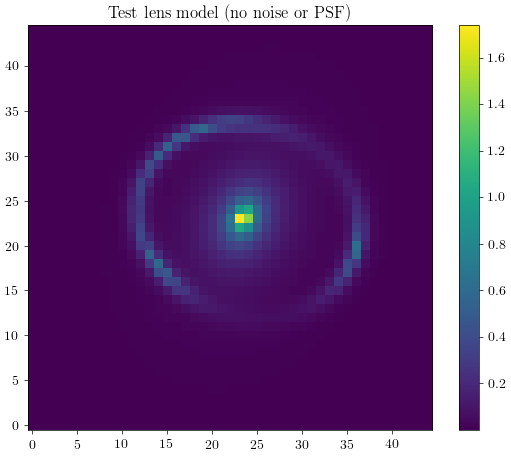

In [13]:
oversample_factor = 1

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

plot.plot(filepath=None,
          title='Test lens model (no noise or PSF)',
          array=model,
          colorbar=True)

In [14]:
calc = pandeia_input.build_pandeia_calc(csv=csv,
                                        array=model, 
                                        lens=physical_lens, 
                                        band='f106', 
                                        oversample_factor=oversample_factor)

100%|██████████| 45/45 [00:00<00:00, 13964.46it/s]


Converting (45, 45) array to point sources...


  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 45/45 [00:26<00:00,  1.73it/s]

Point source conversion complete: 2025 point sources


# Change background types

## Background: none

In [15]:
none_calc = deepcopy(calc)
none_calc['background'] = 'none'

none, execution_time = pandeia_input.get_pandeia_image(none_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'none_{oversample_factor}.npy'), none)

Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 0:03:27


## Background: minzodi (background_level: benchmark (default))

In [18]:
minzodi_calc = deepcopy(calc)
minzodi_calc['background'] = 'minzodi'
minzodi_calc['background_level'] = 'benchmark'

minzodi, execution_time = pandeia_input.get_pandeia_image(minzodi_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'minzodi_{oversample_factor}.npy'), minzodi)

Performing Pandeia calculation...


Pandeia calculation complete
Execution time: 0:03:24


## Background: ecliptic

In [22]:
ecliptic_calc = deepcopy(calc)
ecliptic_calc['background'] = 'ecliptic'
ecliptic_calc['background_level'] = 'medium'

ecliptic, execution_time = pandeia_input.get_pandeia_image(ecliptic_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'ecliptic_{oversample_factor}.npy'), ecliptic)

Performing Pandeia calculation...


Pandeia calculation complete
Execution time: 0:03:22


## Compare background types

In [23]:
none = np.load(os.path.join(array_dir, f'none_{oversample_factor}.npy'))
minzodi = np.load(os.path.join(array_dir, f'minzodi_{oversample_factor}.npy'))
ecliptic = np.load(os.path.join(array_dir, f'ecliptic_{oversample_factor}.npy'))

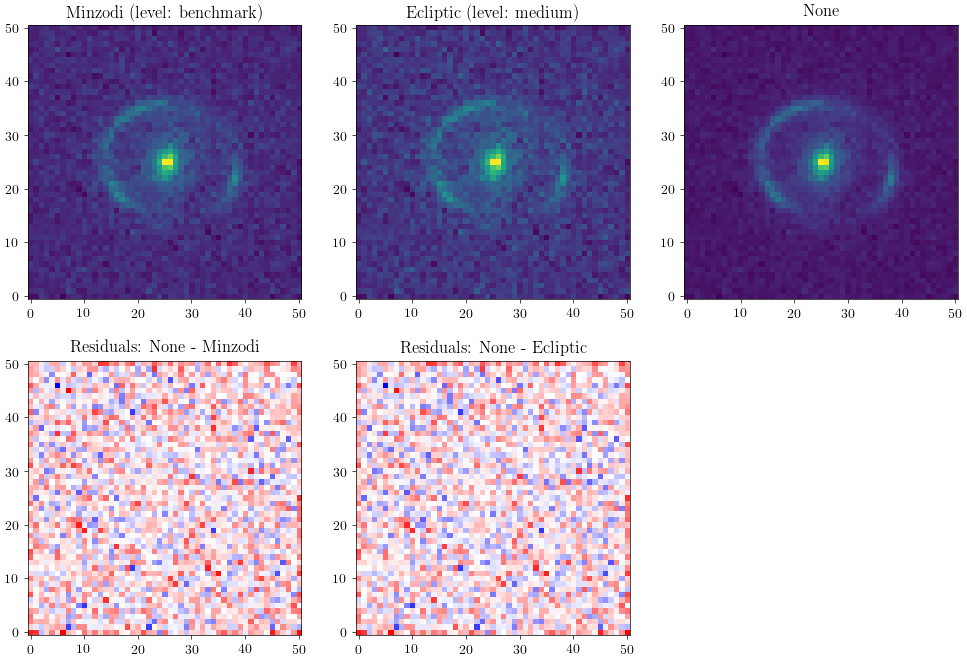

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# array_list = [pandeia - crs_off, pandeia - dark_off, pandeia - ffnoise_off, pandeia - readnoise_off, pandeia - scatter_off, pandeia - saturation_off]

ax0 = ax[0,0].imshow(minzodi, cmap='viridis')
ax[0,0].set_title('Minzodi (level: benchmark)')

ax1 = ax[0,1].imshow(ecliptic, cmap='viridis')
ax[0,1].set_title('Ecliptic (level: medium)')

ax2 = ax[0,2].imshow(none, cmap='viridis')
ax[0,2].set_title('None')

ax3 = ax[1,0].imshow(none - minzodi, cmap='bwr')
ax[1,0].set_title('Residuals: None - Minzodi')

ax4 = ax[1,1].imshow(none - ecliptic, cmap='bwr')
ax[1,1].set_title('Residuals: None - Ecliptic')

ax[1,2].remove()

# fig.colorbar(ax0, ax=[ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]])

# plt.savefig(os.path.join(figure_dir, 'noise_asinh.png'))
plt.show()

# Change background level (Minzodi)

## Background level: benchmark (default)

In [25]:
# this was calculated above, so just load it below

## Background level: high

In [26]:
minzodi_high_calc = deepcopy(calc)
minzodi_high_calc['background'] = 'minzodi'
minzodi_high_calc['background_level'] = 'high'

minzodi_high, execution_time = pandeia_input.get_pandeia_image(minzodi_high_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'minzodi_high_{oversample_factor}.npy'), minzodi_high)

Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 0:03:24


## Background level: medium

In [27]:
minzodi_medium_calc = deepcopy(calc)
minzodi_medium_calc['background'] = 'minzodi'
minzodi_medium_calc['background_level'] = 'medium'

minzodi_medium, execution_time = pandeia_input.get_pandeia_image(minzodi_medium_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'minzodi_medium_{oversample_factor}.npy'), minzodi_medium)

Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:24


## Background level: low

In [28]:
minzodi_low_calc = deepcopy(calc)
minzodi_low_calc['background'] = 'minzodi'
minzodi_low_calc['background_level'] = 'low'

minzodi_low, execution_time = pandeia_input.get_pandeia_image(minzodi_low_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, f'minzodi_low_{oversample_factor}.npy'), minzodi_low)

Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:33


## Compare background levels

In [29]:
minzodi_benchmark = np.load(os.path.join(array_dir, f'minzodi_{oversample_factor}.npy'))
minzodi_high = np.load(os.path.join(array_dir, f'minzodi_high_{oversample_factor}.npy'))
minzodi_medium = np.load(os.path.join(array_dir, f'minzodi_medium_{oversample_factor}.npy'))
minzodi_low = np.load(os.path.join(array_dir, f'minzodi_low_{oversample_factor}.npy'))

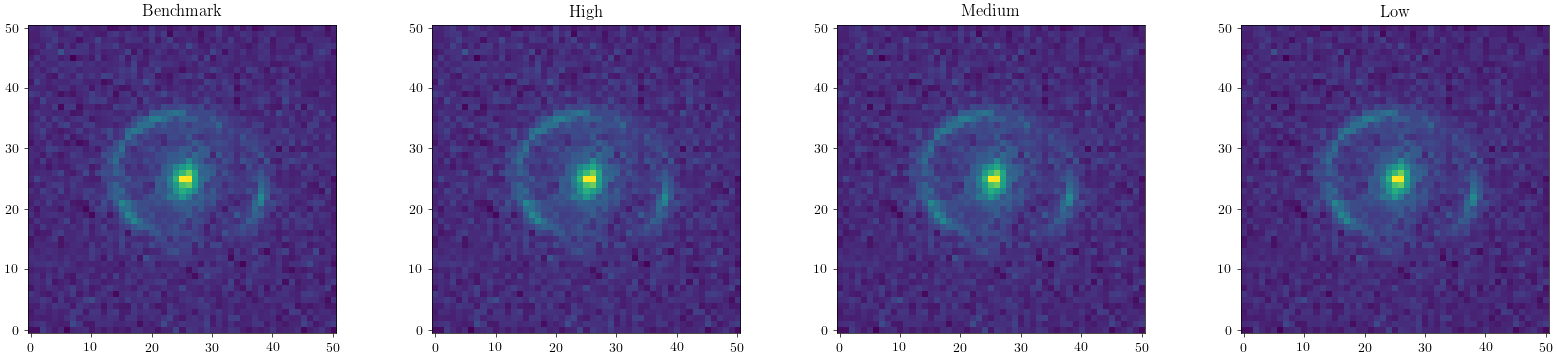

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

ax0 = ax[0].imshow(minzodi_benchmark, cmap='viridis')
ax[0].set_title('Benchmark')

ax1 = ax[1].imshow(minzodi_high, cmap='viridis')
ax[1].set_title('High')

ax2 = ax[2].imshow(minzodi_medium, cmap='viridis')
ax[2].set_title('Medium')

ax3 = ax[3].imshow(minzodi_low, cmap='viridis')
ax[3].set_title('Low')

# fig.colorbar(ax0, ax=[ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]])

# plt.savefig(os.path.join(figure_dir, 'noise_asinh.png'))
plt.show()